In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
term_data = pd.read_csv('term-deposit-marketing-2020.csv')
term_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [44]:
term_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [45]:
term_data['y'].value_counts()

y
no     37104
yes     2896
Name: count, dtype: int64

### Looking at the different features

### AGE

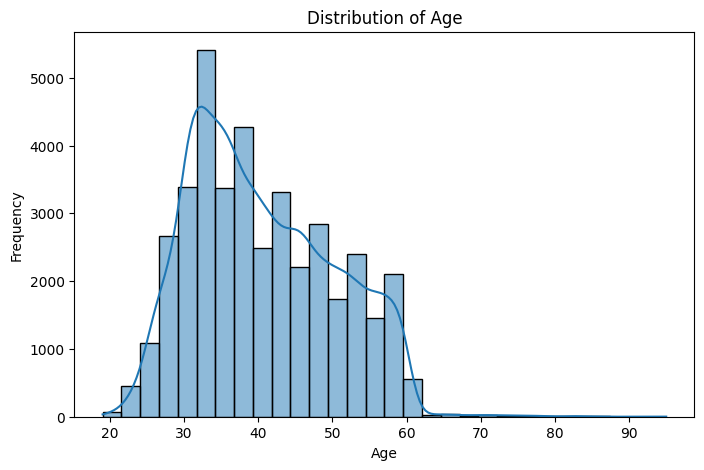

In [46]:
plt.figure(figsize=(8, 5))
sns.histplot(term_data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

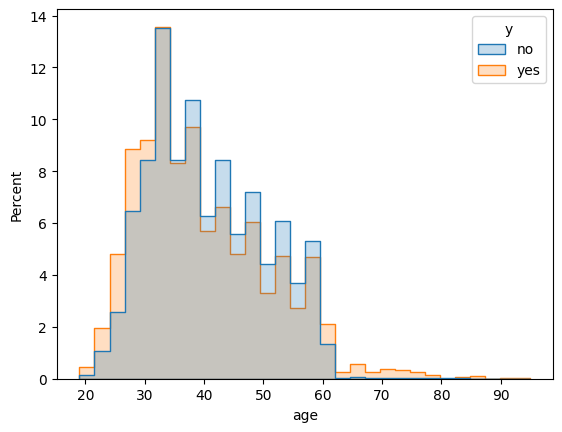

In [47]:
# Plot without custom labels to see the default
sns.histplot(data=term_data, x='age', hue='y', bins=30, element='step', 
             stat='percent', common_norm=False)
plt.show()  # Check what the default legend shows

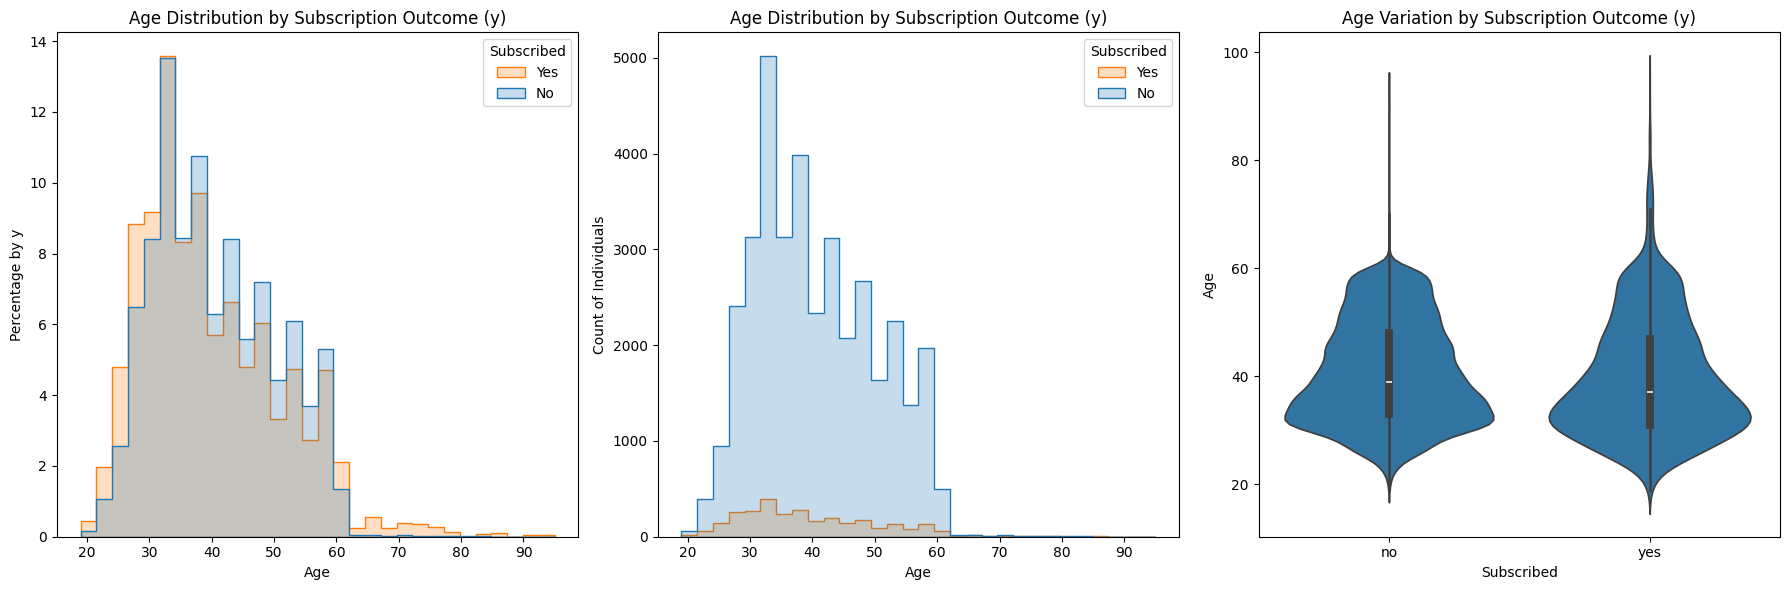

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Subplot 1: Histograms for 'age' by 'y'
sns.histplot(data=term_data, x='age', hue='y', bins=30, element='step', stat='percent', common_norm=False, ax=axes[0])
axes[0].set_title('Age Distribution by Subscription Outcome (y)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Percentage by y')
axes[0].legend(title='Subscribed', loc='upper right', labels=['Yes', 'No'])

# Subplot 1: Histograms for 'age' by 'y'
sns.histplot(data=term_data, x='age', hue='y', bins=30, element='step', stat='count', common_norm=False, ax=axes[1])
axes[1].set_title('Age Distribution by Subscription Outcome (y)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count of Individuals')
axes[1].legend(title='Subscribed', loc='upper right', labels=['Yes', 'No'])

# Subplot 2: Violinplot for 'age' by 'y'
sns.violinplot(data=term_data, x='y', y='age', ax=axes[2])
axes[2].set_title('Age Variation by Subscription Outcome (y)')
axes[2].set_xlabel('Subscribed')
axes[2].set_ylabel('Age')

plt.tight_layout()
plt.show()

### Age in general, does not show any particular distinctions for the two y classes, in terms of relative percentages.

In [49]:
# Create a new column 'age_group' based on the specified bins
age_bins = [0, 33, 42, 60, np.inf]
age_labels = ['<33', '33-42', '42-60', '>60']
term_data['age_group'] = pd.cut(term_data['age'], bins=age_bins, labels=age_labels, right=False)

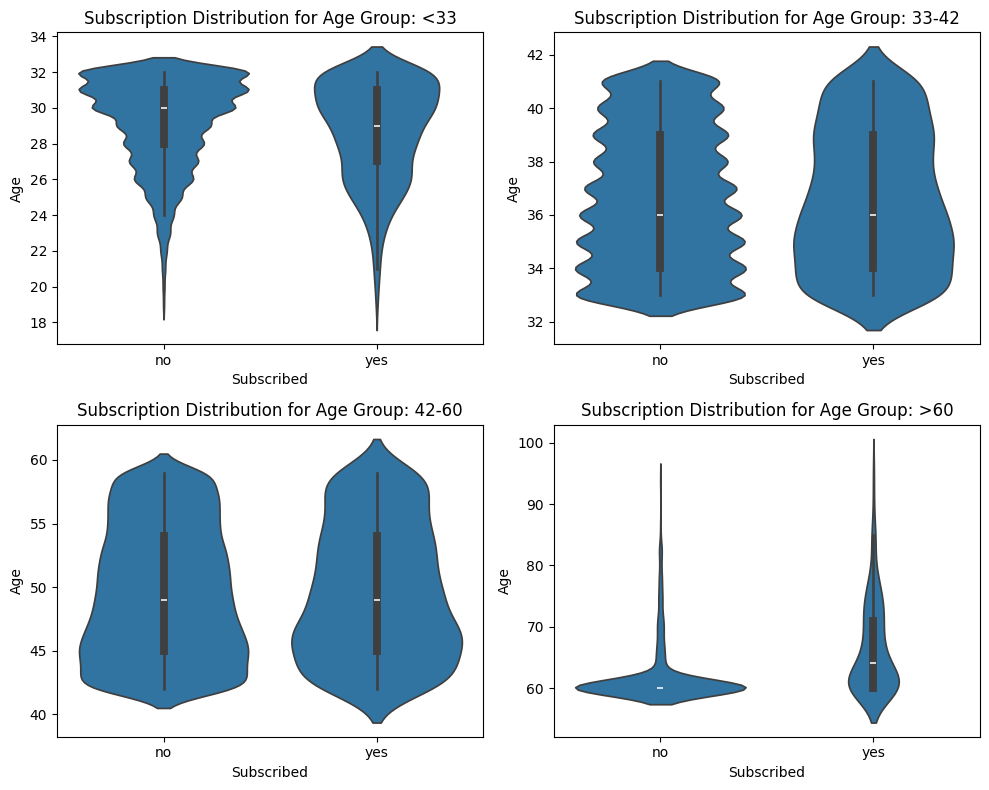

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
age_group_list = term_data['age_group'].cat.categories

for idx, age_group in enumerate(age_group_list):
    ax = axes[idx // 2, idx % 2]
    sns.violinplot(
        data=term_data[term_data['age_group'] == age_group],
        x='y', y='age', ax=ax
    )
    ax.set_title(f'Subscription Distribution for Age Group: {age_group}')
    ax.set_xlabel('Subscribed')
    ax.set_ylabel('Age')

plt.tight_layout()
plt.show()

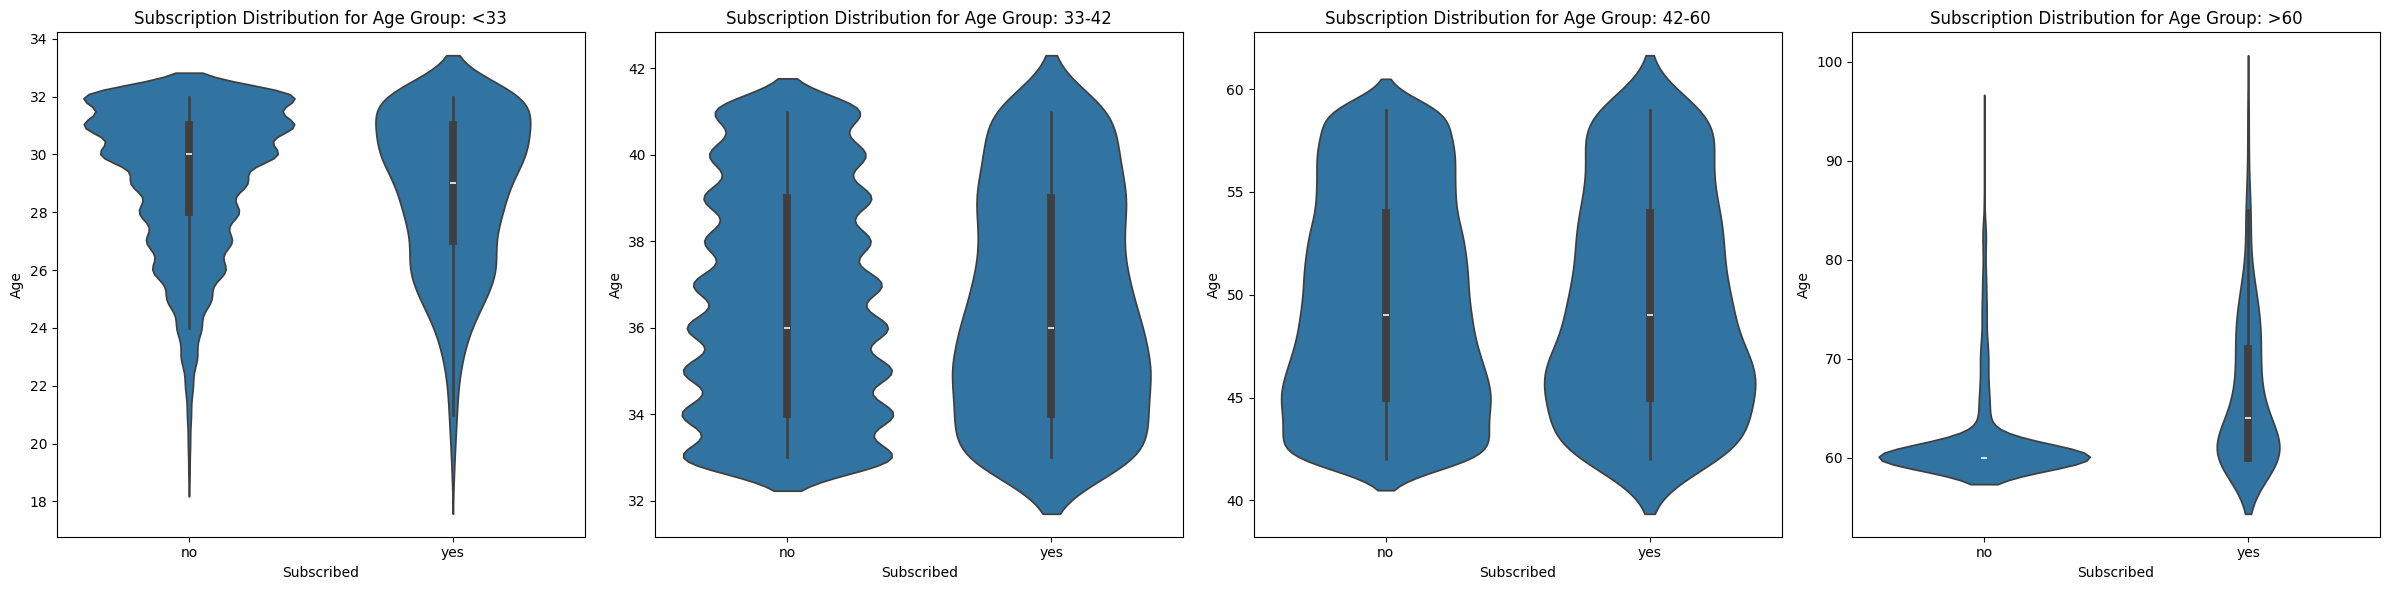

In [51]:
# Define new bins and labels for age groups: <30, 30-60, >60
new_age_bins = [0, 33, 42, 60, np.inf]
new_age_labels = ['<33', '33-42', '42-60', '>60']
term_data['age_group_new'] = pd.cut(term_data['age'], bins=new_age_bins, labels=new_age_labels, right=False)

# Prepare subplots for each new age group
fig, axes = plt.subplots(1, 4, figsize=(24, 6))
for idx, age_group in enumerate(new_age_labels):
    ax = axes[idx]
    sns.violinplot(
        data=term_data[term_data['age_group_new'] == age_group],
        x='y', y='age', ax=ax
    )
    ax.set_title(f'Subscription Distribution for Age Group: {age_group}')
    ax.set_xlabel('Subscribed')
    ax.set_ylabel('Age')

plt.tight_layout()
plt.show()

C:\Users\schakr18\AppData\Local\Temp\ipykernel_47592\573187482.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_y_by_age_group_new = term_data.groupby('age_group_new')['y_encoded'].mean().reset_index()


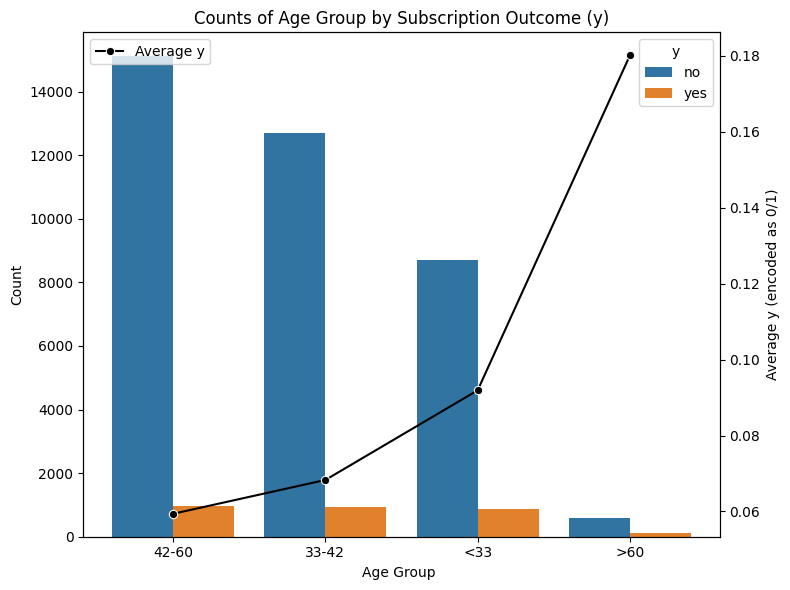

In [52]:
# Calculate average y (encoded as 0/1) for each age_group_new
# First, encode 'y' as 0/1 if not already present
if 'y_encoded' not in term_data.columns:
    term_data['y_encoded'] = (term_data['y'] == 'yes').astype(int)

avg_y_by_age_group_new = term_data.groupby('age_group_new')['y_encoded'].mean().reset_index()

# Sort age_group_new by increasing average y
sorted_age_groups = avg_y_by_age_group_new.sort_values('y_encoded')['age_group_new']

fig, ax1 = plt.subplots(figsize=(8, 6))

# Countplot for y by age_group_new, ordered by increasing average y
sns.countplot(
    data=term_data,
    x='age_group_new',
    hue='y',
    order=sorted_age_groups,
    ax=ax1
)
ax1.set_xlabel('Age Group ')
ax1.set_ylabel('Count')
ax1.set_title('Counts of Age Group by Subscription Outcome (y)')

# Lineplot for average y_encoded by age_group_new
ax2 = ax1.twinx()
sns.lineplot(
    data=avg_y_by_age_group_new,
    x='age_group_new',
    y='y_encoded',
    marker='o',
    color='black',
    ax=ax2,
    label='Average y'
)
ax2.set_ylabel('Average y (encoded as 0/1)')
ax2.set_xticks(range(len(sorted_age_groups)))
ax2.set_xticklabels(sorted_age_groups)
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

### The trend shows that more number of people who are early career people or retired tends to subscribe more, even though the number of retired people are small.

### Thus, a new feature categorizing the age into the above 4 groups can be a distinguishing feature.

### BALANCE

In [53]:
term_data.describe()

,age,balance,day,duration,campaign,y_encoded
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175,0.072400
std,9.641776,2903.769716,8.278127,259.366498,3.239051,0.259152
min,19.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000,0.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000,0.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,1.000000


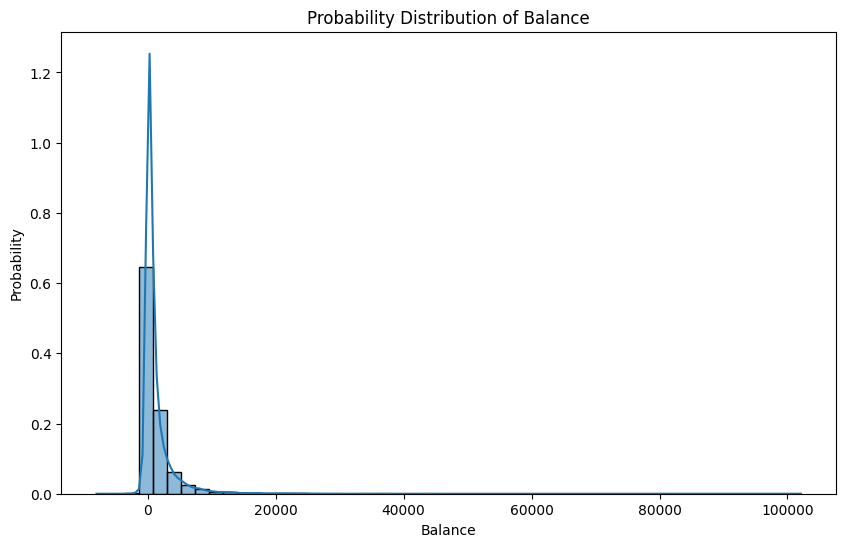

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(term_data['balance'], bins=50, kde=True, stat='probability')
plt.title('Probability Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Probability')
plt.show()

#### It is apparent that there are a lot of outliers. It would be prudent to break the balance feature down to some quartiles and then see the distribution

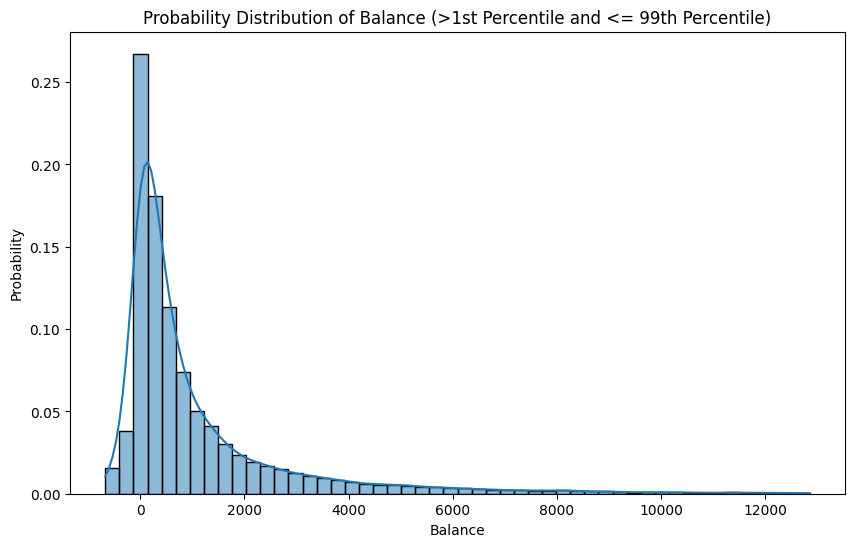

In [55]:
# Calculate the 99th percentile of the 'balance' column
balance_99 = term_data['balance'].quantile(0.99)
balance_1 = term_data['balance'].quantile(0.01)

# Filter the dataframe to include only balances below or equal to the 99th percentile
filtered_balance = term_data[(term_data['balance'] <= balance_99) & (term_data['balance'] >= balance_1)]['balance']

plt.figure(figsize=(10, 6))
sns.histplot(filtered_balance, bins=50, kde=True, stat='probability')
plt.title('Probability Distribution of Balance (>1st Percentile and <= 99th Percentile)')
plt.xlabel('Balance')
plt.ylabel('Probability')
plt.show()

In [56]:
filtered_balance_df = term_data[(term_data['balance'] <= balance_99) & (term_data['balance'] >= balance_1)]

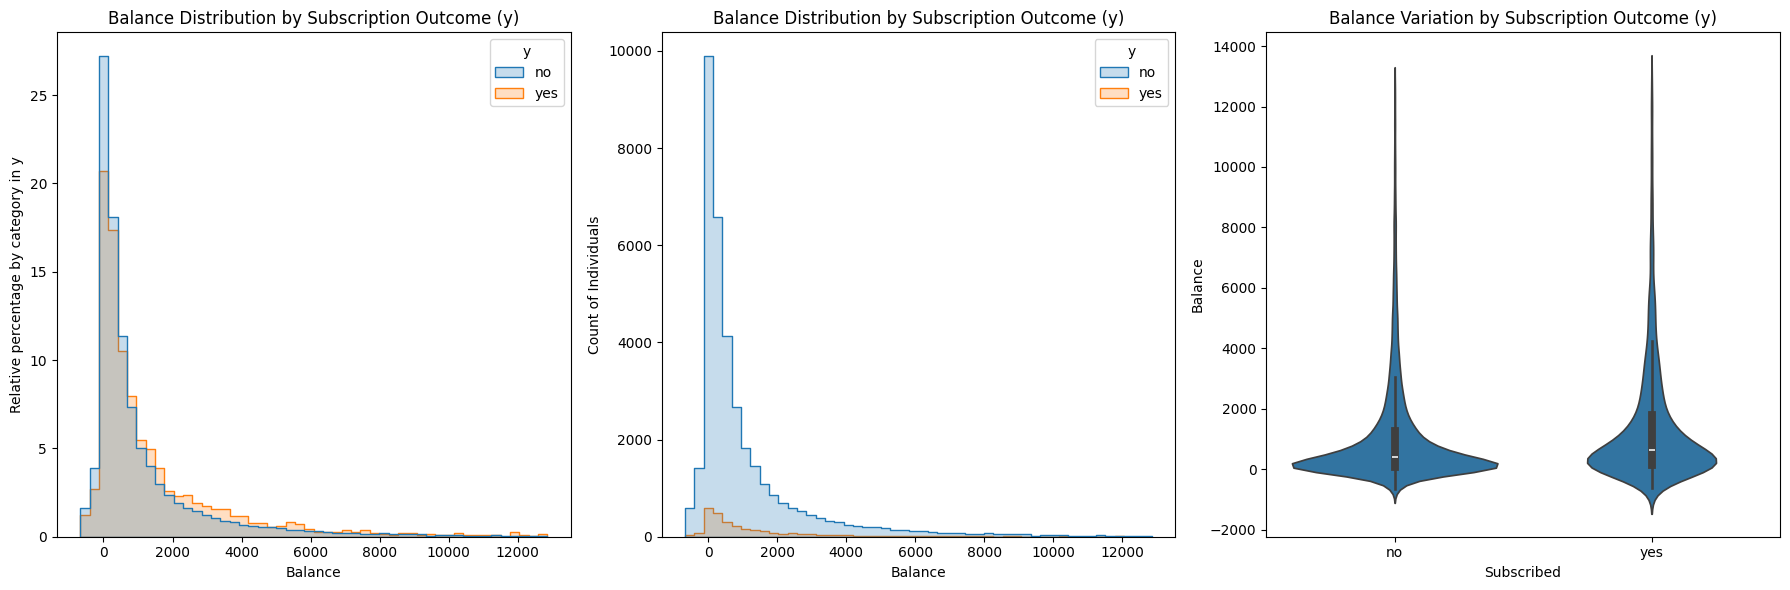

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram with hue by 'y'
sns.histplot(
    data=filtered_balance_df,
    x='balance',
    hue='y',
    bins=50,
    element='step',
    stat='percent',
    common_norm=False,
    ax=axes[0]
)
axes[0].set_title('Balance Distribution by Subscription Outcome (y)')
axes[0].set_xlabel('Balance')
axes[0].set_ylabel('Relative percentage by category in y')

# Histogram with hue by 'y'
sns.histplot(
    data=filtered_balance_df,
    x='balance',
    hue='y',
    bins=50,
    element='step',
    stat='count',
    common_norm=False,
    ax=axes[1]
)
axes[1].set_title('Balance Distribution by Subscription Outcome (y)')
axes[1].set_xlabel('Balance')
axes[1].set_ylabel('Count of Individuals')

# Violin plot by 'y'
sns.violinplot(
    data=filtered_balance_df,
    x='y',
    y='balance',
    ax=axes[2]
)
axes[2].set_title('Balance Variation by Subscription Outcome (y)')
axes[2].set_xlabel('Subscribed')
axes[2].set_ylabel('Balance')

plt.tight_layout()
plt.show()

#### Documentation:
* Trying out different bin ranges.
* Initially, tried out less than 1000, 1000-2000, 2000-4000 and >4000.
* Then, <250, 250-750, 750-2000 and >2000.
* **Then, <0, 0-750, 750-2000, 2000-4000 and >4000.**

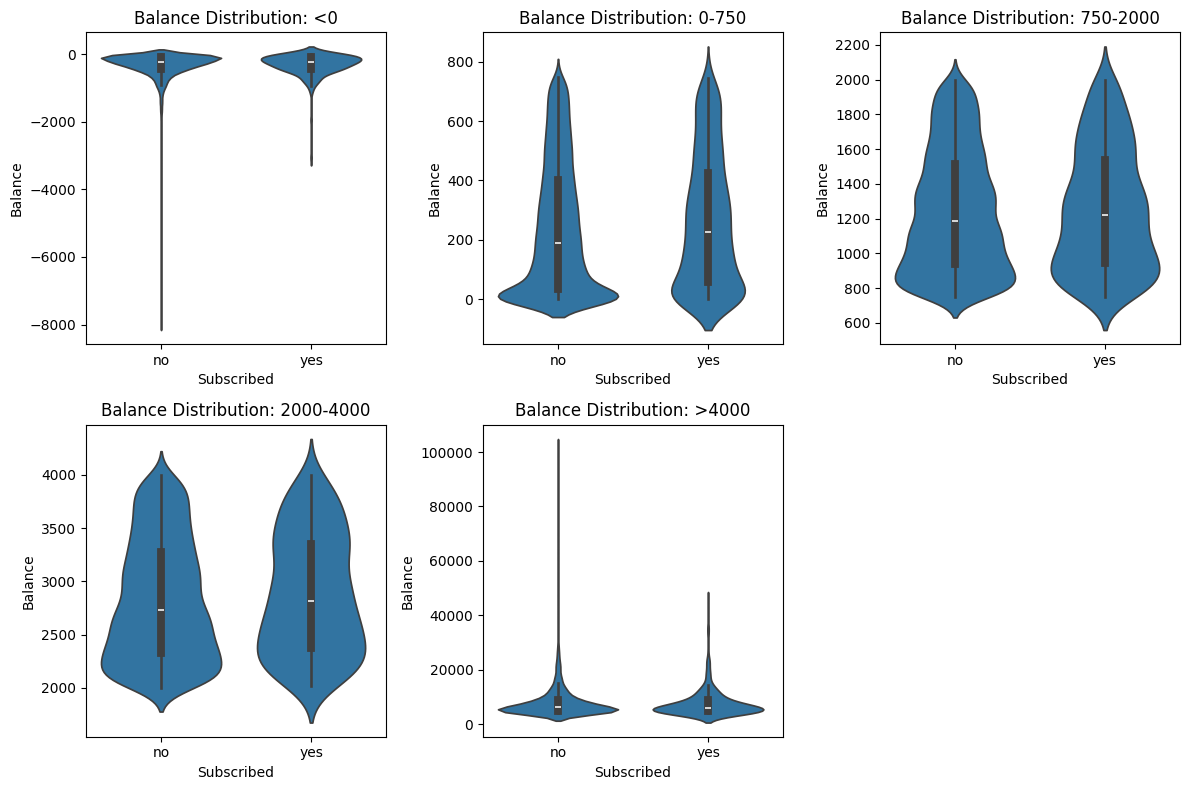

In [58]:
# Define bins and labels for balance categories
balance_bins = [-np.inf, 0, 750, 2000, 4000, np.inf]
balance_labels = ['<0', '0-750','750-2000', '2000-4000','>4000']
term_data['balance_group'] = pd.cut(term_data['balance'], bins=balance_bins, labels=balance_labels, right=False)


# Prepare subplots for each balance group
fig, axes = plt.subplots(2,3, figsize=(12, 8))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing
for idx, balance_group in enumerate(balance_labels):
    ax = axes[idx]
    sns.violinplot(
        data=term_data[term_data['balance_group'] == balance_group],
        x='y', y='balance', ax=ax
    )
    ax.set_title(f'Balance Distribution: {balance_group}')
    ax.set_xlabel('Subscribed')
    ax.set_ylabel('Balance')

# Remove any empty subplots if there are fewer balance groups than subplots
for j in range(len(balance_labels), len(axes)):
    fig.delaxes(axes[j])
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()

C:\Users\schakr18\AppData\Local\Temp\ipykernel_47592\335958551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_balance_df['balance_group'] = pd.cut(


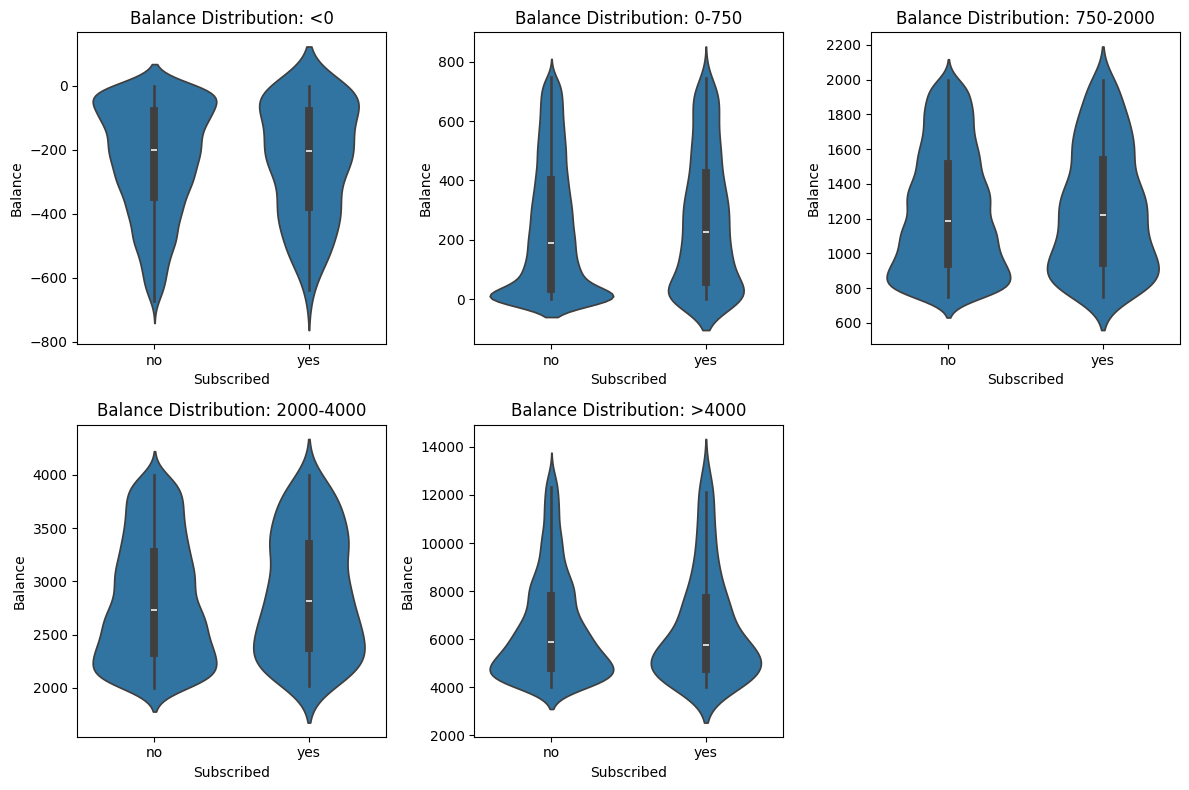

In [59]:
# Define bins and labels for balance categories on filtered_balance_df
filtered_balance_df['balance_group'] = pd.cut(
    filtered_balance_df['balance'],
    bins=balance_bins,
    labels=balance_labels,
    right=False
)

# Prepare subplots for each balance group
fig, axes = plt.subplots(2,3, figsize=(12, 8))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing
for idx, balance_group in enumerate(balance_labels):
    ax = axes[idx]
    sns.violinplot(
        data=filtered_balance_df[filtered_balance_df['balance_group'] == balance_group],
        x='y', y='balance', ax=ax
    )
    ax.set_title(f'Balance Distribution: {balance_group}')
    ax.set_xlabel('Subscribed')
    ax.set_ylabel('Balance')

# Remove any empty subplots if there are fewer balance groups than subplots
for j in range(len(balance_labels), len(axes)):
    fig.delaxes(axes[j])
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()

C:\Users\schakr18\AppData\Local\Temp\ipykernel_47592\1364870947.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_balance_group_counts = filtered_balance_df.groupby(['balance_group', 'y']).size().reset_index(name='count')
C:\Users\schakr18\AppData\Local\Temp\ipykernel_47592\1364870947.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_y_by_balance_filtered = filtered_balance_df.groupby('balance_group')['y_encoded'].mean().reset_index()


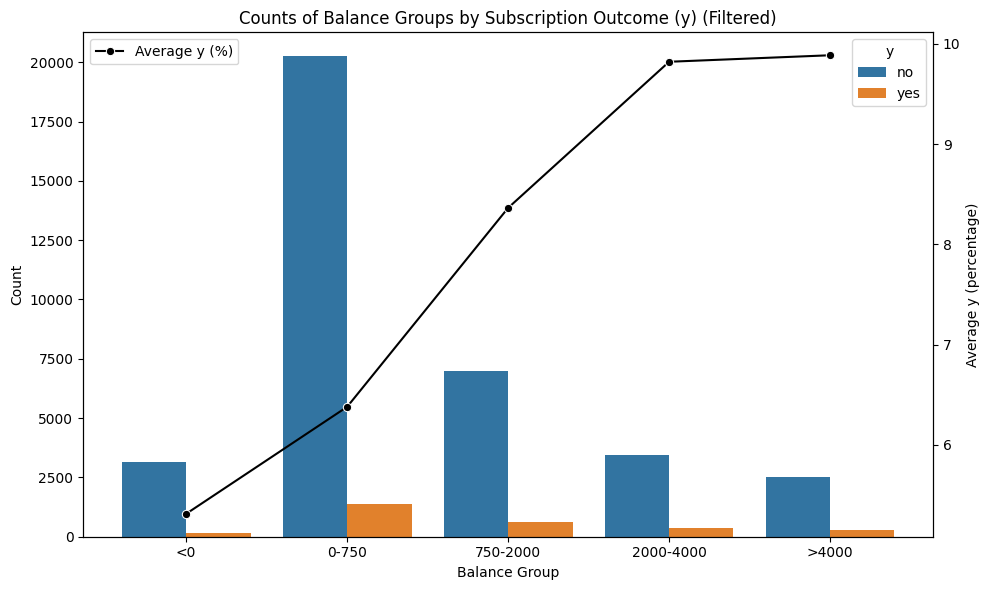

In [60]:
# Count of each balance_group by y in filtered_balance_df
filtered_balance_group_counts = filtered_balance_df.groupby(['balance_group', 'y']).size().reset_index(name='count')

# Average y (encoded as 0/1) by balance_group in filtered_balance_df
avg_y_by_balance_filtered = filtered_balance_df.groupby('balance_group')['y_encoded'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Barplot: counts by balance_group and y
sns.barplot(
    data=filtered_balance_group_counts,
    x='balance_group',
    y='count',
    hue='y',
    order=balance_labels,
    ax=ax1
)
ax1.set_ylabel('Count')
ax1.set_xlabel('Balance Group')
ax1.set_title('Counts of Balance Groups by Subscription Outcome (y) (Filtered)')

# Line plot: average y_encoded by balance_group (as percentage)
ax2 = ax1.twinx()
sns.lineplot(
    data=avg_y_by_balance_filtered,
    x='balance_group',
    y=avg_y_by_balance_filtered['y_encoded'] * 100,
    marker='o',
    color='black',
    ax=ax2,
    label='Average y (%)'
)
ax2.set_ylabel('Average y (percentage)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [61]:
term_data = filtered_balance_df.copy()

#### The balance_group feature shows an increasing chances of subscription with increasing balance groups. This can be a feature for classification.

### JOB

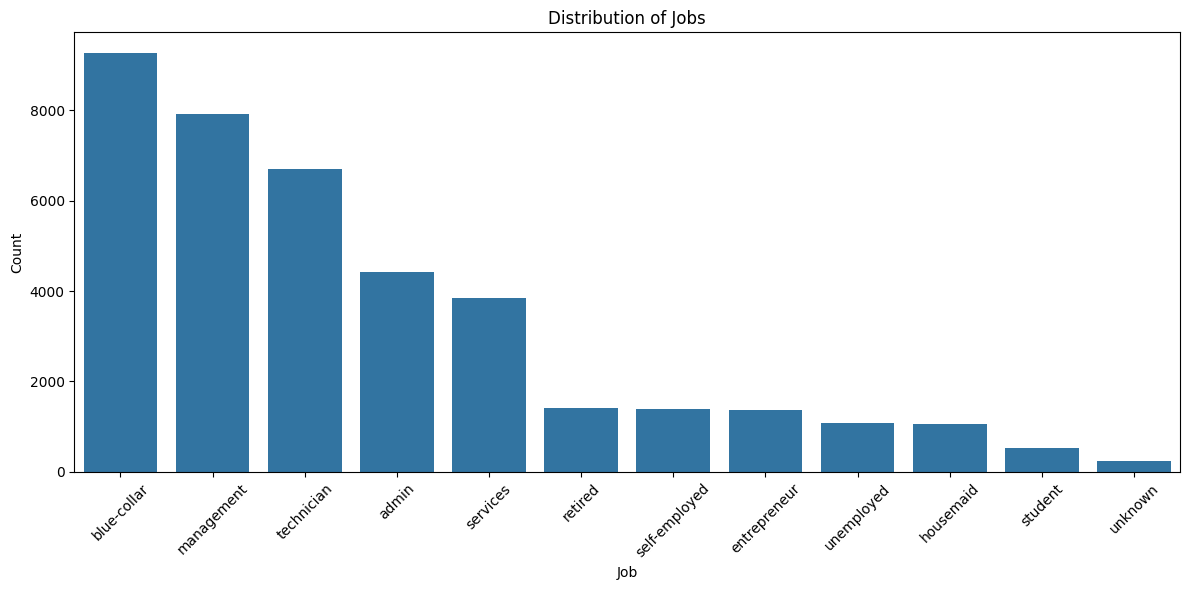

In [62]:
plt.figure(figsize=(12, 6))
sns.countplot(data=term_data, x='job', order=term_data['job'].value_counts().index)
plt.title('Distribution of Jobs')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

show the bar plots of the different categories in the 'job' feature in the trem_data. Also, show the average value of y in terms of percentages for the categories in the same plot.

C:\Users\schakr18\AppData\Local\Temp\ipykernel_47592\4175464415.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


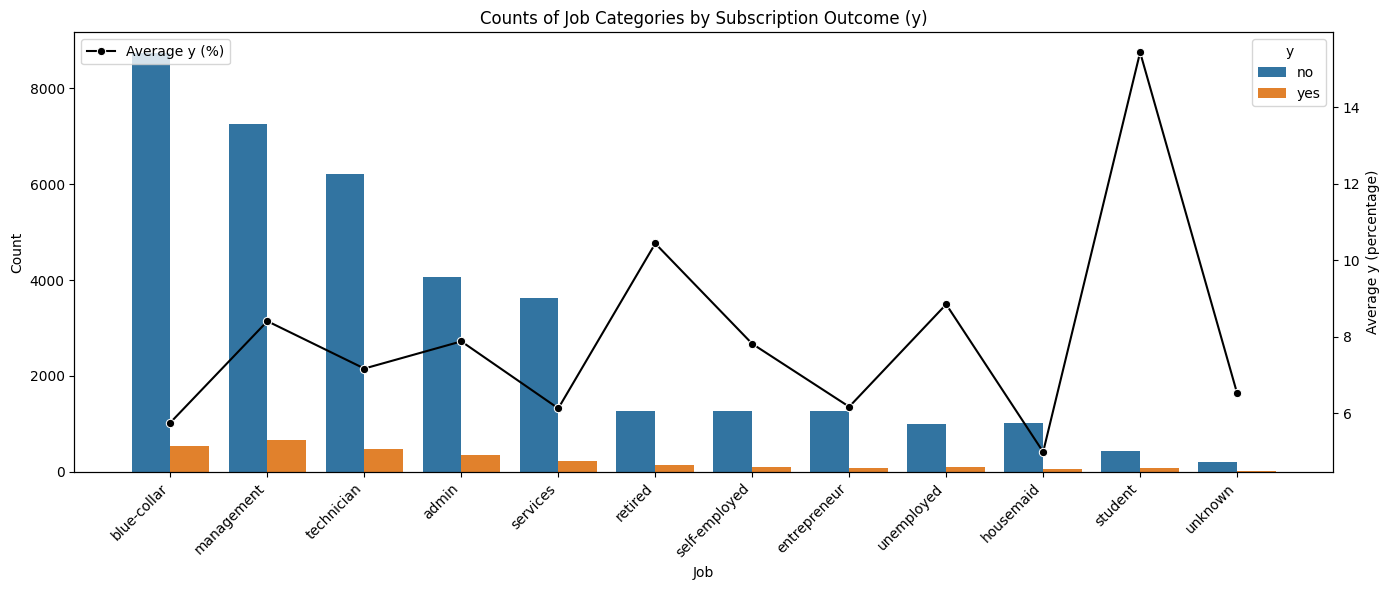

In [63]:
# Count of each job category by y
job_counts = term_data.groupby(['job', 'y']).size().reset_index(name='count')

# Average y (encoded as 0/1) by job, as percentage
avg_y_by_job = term_data.groupby('job')['y_encoded'].mean().reset_index()
avg_y_by_job['y_encoded'] = avg_y_by_job['y_encoded'] * 100  # convert to percentage

fig, ax1 = plt.subplots(figsize=(14, 6))

# Barplot: counts by job and y
sns.barplot(
    data=job_counts,
    x='job',
    y='count',
    hue='y',
    order=term_data['job'].value_counts().index,
    ax=ax1
)
ax1.set_ylabel('Count')
ax1.set_xlabel('Job')
ax1.set_title('Counts of Job Categories by Subscription Outcome (y)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Line plot: average y_encoded by job (percentage)
ax2 = ax1.twinx()
sns.lineplot(
    data=avg_y_by_job,
    x='job',
    y='y_encoded',
    marker='o',
    color='black',
    ax=ax2,
    label='Average y (%)'
)
ax2.set_ylabel('Average y (percentage)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

#### Jobs can be grouped into fewer categories based on their closeness
* Blue-collar, housemaid involve manual labor.
* Technician, admin and services can be grouped together.
* Management and entrpreneur can be grouped together.
* Retired, unemployed, self-employed and student can be grouped together.
* Unknown can be another category.

In [64]:
# Define mapping for job groups
job_group_map = {
    'blue-collar': 'manual_labor',
    'housemaid': 'manual_labor',
    'technician': 'office_support',
    'admin': 'office_support',
    'services': 'office_support',
    'management': 'management_entrepreneur',
    'entrepreneur': 'management_entrepreneur',
    'retired': 'not_working',
    'unemployed': 'not_working',
    'self-employed': 'not_working',
    'student': 'not_working',
    'unknown': 'not_working'
}

# Create new feature 'job_group'
term_data['job_group'] = term_data['job'].map(job_group_map)

show the bar plots of the different categories in the 'job_group' feature in the term_data. Also, show the average value of y in terms of percentages for the categories in the same plot. Plot the bars in the increasing order of average y value.

C:\Users\schakr18\AppData\Local\Temp\ipykernel_47592\1921157795.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')


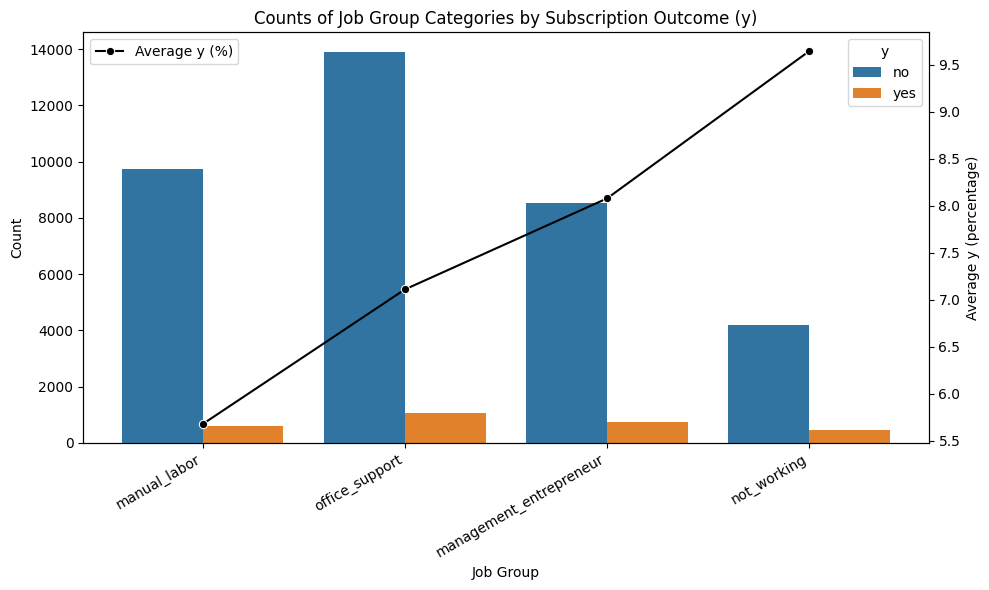

In [65]:
# Calculate average y (encoded as 0/1) for each job_group as percentage
avg_y_by_job_group = term_data.groupby('job_group')['y_encoded'].mean().reset_index()
avg_y_by_job_group['y_encoded'] = avg_y_by_job_group['y_encoded'] * 100  # convert to percentage

# Sort job_group by increasing average y value
sorted_job_groups = avg_y_by_job_group.sort_values('y_encoded')['job_group']

# Count of each job_group by y
job_group_counts = term_data.groupby(['job_group', 'y']).size().reset_index(name='count')

fig, ax1 = plt.subplots(figsize=(10, 6))

# Barplot: counts by job_group and y, ordered by increasing average y
sns.barplot(
    data=job_group_counts,
    x='job_group',
    y='count',
    hue='y',
    order=sorted_job_groups,
    ax=ax1
)
ax1.set_ylabel('Count')
ax1.set_xlabel('Job Group')
ax1.set_title('Counts of Job Group Categories by Subscription Outcome (y)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')

# Line plot: average y_encoded by job_group (percentage)
ax2 = ax1.twinx()
sns.lineplot(
    data=avg_y_by_job_group,
    x='job_group',
    y='y_encoded',
    marker='o',
    color='black',
    ax=ax2,
    label='Average y (%)'
)
ax2.set_ylabel('Average y (percentage)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

C:\Users\schakr18\AppData\Local\Temp\ipykernel_47592\4246241869.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')


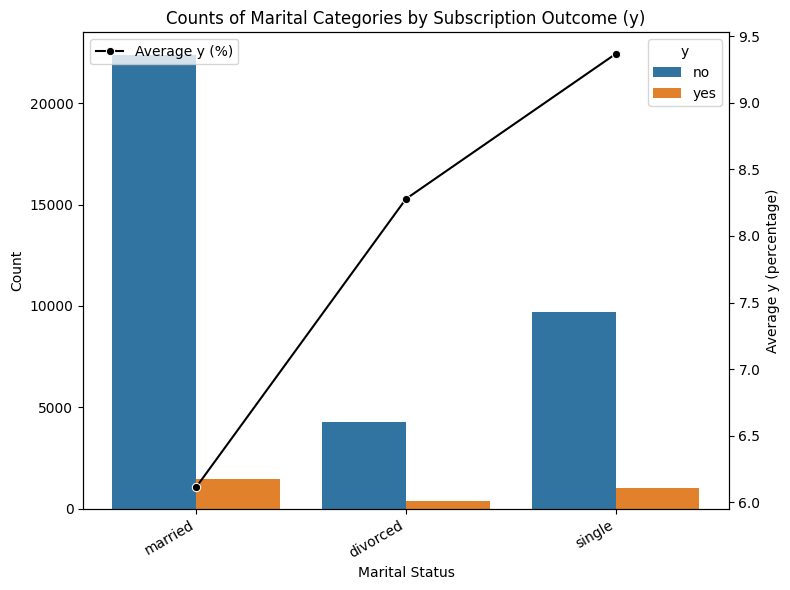

In [66]:
# Calculate average y (encoded as 0/1) for each marital category as percentage
avg_y_by_marital = term_data.groupby('marital')['y_encoded'].mean().reset_index()
avg_y_by_marital['y_encoded'] = avg_y_by_marital['y_encoded'] * 100  # convert to percentage

# Sort marital categories by increasing average y value
sorted_marital = avg_y_by_marital.sort_values('y_encoded')['marital']

# Count of each marital category by y
marital_counts = term_data.groupby(['marital', 'y']).size().reset_index(name='count')

fig, ax1 = plt.subplots(figsize=(8, 6))

# Barplot: counts by marital and y, ordered by increasing average y
sns.barplot(
    data=marital_counts,
    x='marital',
    y='count',
    hue='y',
    order=sorted_marital,
    ax=ax1
)
ax1.set_ylabel('Count')
ax1.set_xlabel('Marital Status')
ax1.set_title('Counts of Marital Categories by Subscription Outcome (y)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')

# Line plot: average y_encoded by marital (percentage)
ax2 = ax1.twinx()
sns.lineplot(
    data=avg_y_by_marital,
    x='marital',
    y='y_encoded',
    marker='o',
    color='black',
    ax=ax2,
    label='Average y (%)'
)
ax2.set_ylabel('Average y (percentage)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

C:\Users\schakr18\AppData\Local\Temp\ipykernel_47592\631929546.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')


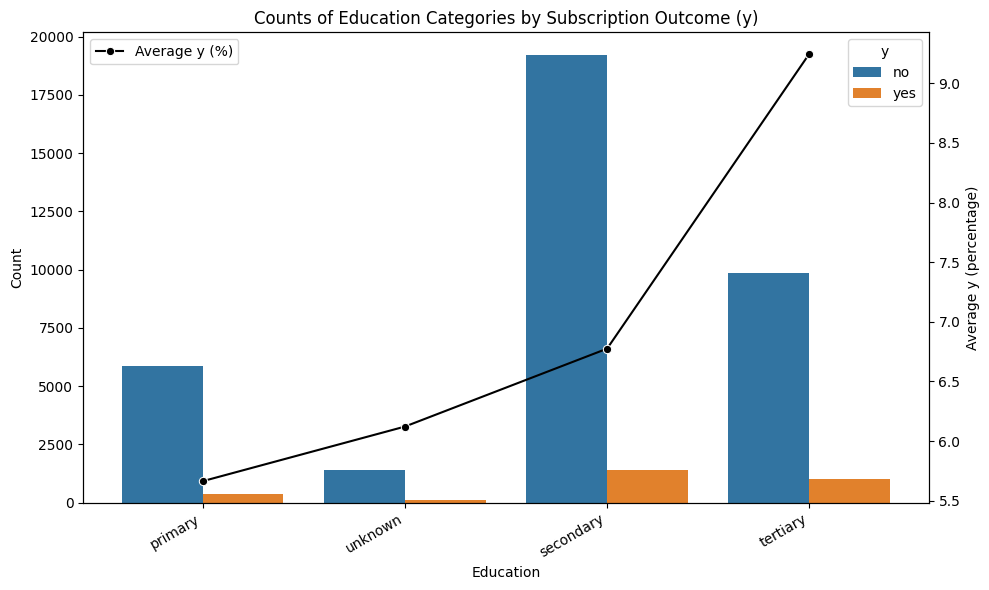

In [67]:
# Calculate average y (encoded as 0/1) for each education category as percentage
avg_y_by_education = term_data.groupby('education')['y_encoded'].mean().reset_index()
avg_y_by_education['y_encoded'] = avg_y_by_education['y_encoded'] * 100  # convert to percentage

# Sort education categories by increasing average y value
sorted_education = avg_y_by_education.sort_values('y_encoded')['education']

# Count of each education category by y
education_counts = term_data.groupby(['education', 'y']).size().reset_index(name='count')

fig, ax1 = plt.subplots(figsize=(10, 6))

# Barplot: counts by education and y, ordered by increasing average y
sns.barplot(
    data=education_counts,
    x='education',
    y='count',
    hue='y',
    order=sorted_education,
    ax=ax1
)
ax1.set_ylabel('Count')
ax1.set_xlabel('Education')
ax1.set_title('Counts of Education Categories by Subscription Outcome (y)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')

# Line plot: average y_encoded by education (percentage)
ax2 = ax1.twinx()
sns.lineplot(
    data=avg_y_by_education,
    x='education',
    y='y_encoded',
    marker='o',
    color='black',
    ax=ax2,
    label='Average y (%)'
)
ax2.set_ylabel('Average y (percentage)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

show the bar plots of the different categories in the default' feature in the term_data. Also, show the average value of y in terms of percentages for the categories in the same plot. Plot the bars in the increasing order of average y value.

C:\Users\schakr18\AppData\Local\Temp\ipykernel_47592\1075243981.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')


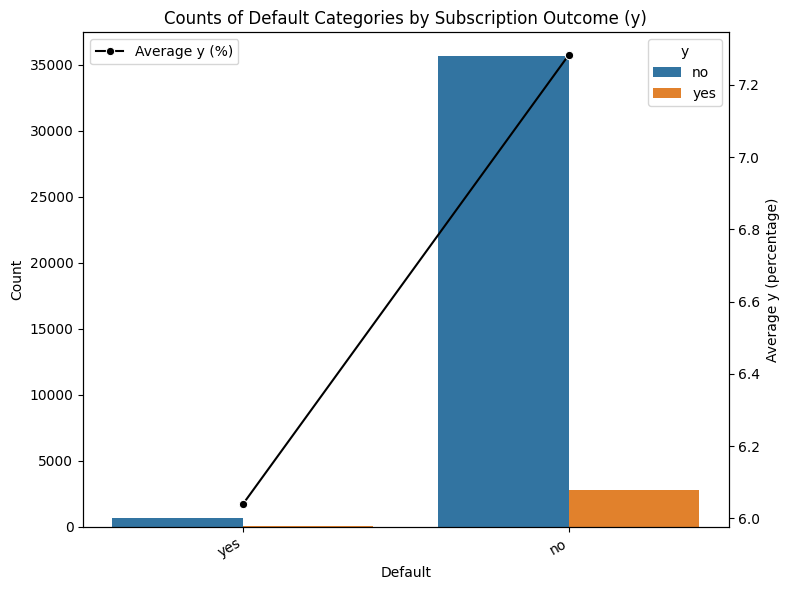

In [68]:
# Calculate average y (encoded as 0/1) for each default category as percentage
avg_y_by_default = term_data.groupby('default')['y_encoded'].mean().reset_index()
avg_y_by_default['y_encoded'] = avg_y_by_default['y_encoded'] * 100  # convert to percentage

# Sort default categories by increasing average y value
sorted_default = avg_y_by_default.sort_values('y_encoded')['default']

# Count of each default category by y
default_counts = term_data.groupby(['default', 'y']).size().reset_index(name='count')

fig, ax1 = plt.subplots(figsize=(8, 6))

# Barplot: counts by default and y, ordered by increasing average y
sns.barplot(
    data=default_counts,
    x='default',
    y='count',
    hue='y',
    order=sorted_default,
    ax=ax1
)
ax1.set_ylabel('Count')
ax1.set_xlabel('Default')
ax1.set_title('Counts of Default Categories by Subscription Outcome (y)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')

# Line plot: average y_encoded by default (percentage)
ax2 = ax1.twinx()
sns.lineplot(
    data=avg_y_by_default,
    x='default',
    y='y_encoded',
    marker='o',
    color='black',
    ax=ax2,
    label='Average y (%)'
)
ax2.set_ylabel('Average y (percentage)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

C:\Users\schakr18\AppData\Local\Temp\ipykernel_47592\4129314896.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')


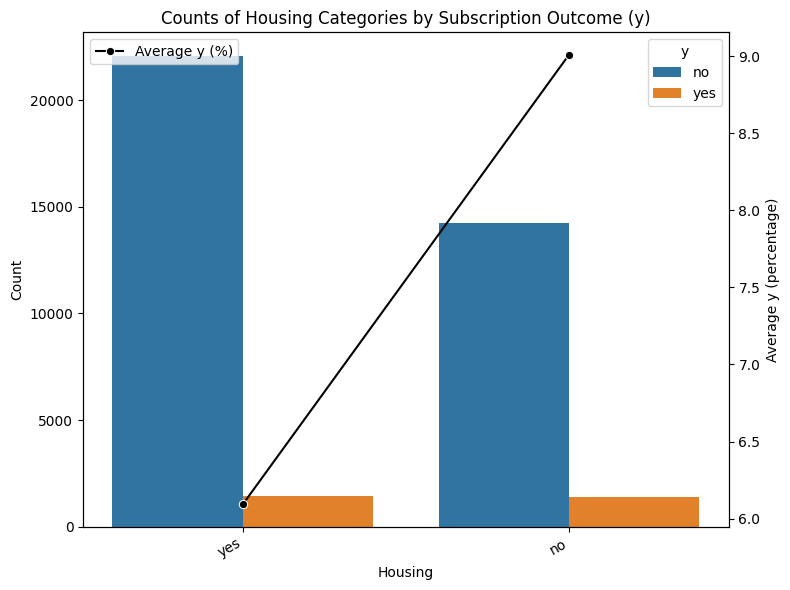

In [69]:
# Calculate average y (encoded as 0/1) for each housing category as percentage
avg_y_by_housing = term_data.groupby('housing')['y_encoded'].mean().reset_index()
avg_y_by_housing['y_encoded'] = avg_y_by_housing['y_encoded'] * 100  # convert to percentage

# Sort housing categories by increasing average y value
sorted_housing = avg_y_by_housing.sort_values('y_encoded')['housing']

# Count of each housing category by y
housing_counts = term_data.groupby(['housing', 'y']).size().reset_index(name='count')

fig, ax1 = plt.subplots(figsize=(8, 6))

# Barplot: counts by housing and y, ordered by increasing average y
sns.barplot(
    data=housing_counts,
    x='housing',
    y='count',
    hue='y',
    order=sorted_housing,
    ax=ax1
)
ax1.set_ylabel('Count')
ax1.set_xlabel('Housing')
ax1.set_title('Counts of Housing Categories by Subscription Outcome (y)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')

# Line plot: average y_encoded by housing (percentage)
ax2 = ax1.twinx()
sns.lineplot(
    data=avg_y_by_housing,
    x='housing',
    y='y_encoded',
    marker='o',
    color='black',
    ax=ax2,
    label='Average y (%)'
)
ax2.set_ylabel('Average y (percentage)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

C:\Users\schakr18\AppData\Local\Temp\ipykernel_47592\455950690.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')


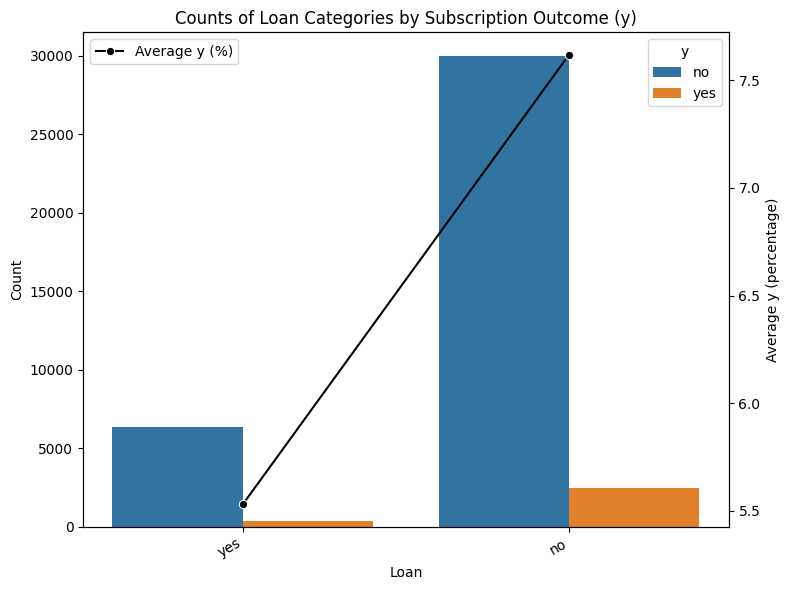

In [70]:
# Calculate average y (encoded as 0/1) for each loan category as percentage
avg_y_by_loan = term_data.groupby('loan')['y_encoded'].mean().reset_index()
avg_y_by_loan['y_encoded'] = avg_y_by_loan['y_encoded'] * 100  # convert to percentage

# Sort loan categories by increasing average y value
sorted_loan = avg_y_by_loan.sort_values('y_encoded')['loan']

# Count of each loan category by y
loan_counts = term_data.groupby(['loan', 'y']).size().reset_index(name='count')

fig, ax1 = plt.subplots(figsize=(8, 6))

# Barplot: counts by loan and y, ordered by increasing average y
sns.barplot(
    data=loan_counts,
    x='loan',
    y='count',
    hue='y',
    order=sorted_loan,
    ax=ax1
)
ax1.set_ylabel('Count')
ax1.set_xlabel('Loan')
ax1.set_title('Counts of Loan Categories by Subscription Outcome (y)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')

# Line plot: average y_encoded by loan (percentage)
ax2 = ax1.twinx()
sns.lineplot(
    data=avg_y_by_loan,
    x='loan',
    y='y_encoded',
    marker='o',
    color='black',
    ax=ax2,
    label='Average y (%)'
)
ax2.set_ylabel('Average y (percentage)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [71]:
term_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,age_group,age_group_new,y_encoded,balance_group,job_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no,42-60,42-60,0,2000-4000,management_entrepreneur
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no,42-60,42-60,0,0-750,office_support
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no,33-42,33-42,0,0-750,management_entrepreneur
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no,42-60,42-60,0,750-2000,manual_labor
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no,33-42,33-42,0,0-750,not_working


In [72]:
term_data['job_balance_group'] = term_data['job_group'] + '_' + term_data['balance_group'].astype(str)
term_data['job_balance_group'] = term_data['job_balance_group'].astype('category')

In [73]:
# Create a new feature by combining 'age_group' and 'balance_group'
term_data['age_balance_group'] = term_data['age_group'].astype(str) + '_' + term_data['balance_group'].astype(str)
term_data['age_balance_group'] = term_data['age_balance_group'].astype('category')

C:\Users\schakr18\AppData\Local\Temp\ipykernel_47592\1611997756.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_balance_counts = term_data.groupby(['age_balance_group', 'y']).size().reset_index(name='count')
C:\Users\schakr18\AppData\Local\Temp\ipykernel_47592\1611997756.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_y_by_age_balance = term_data.groupby('age_balance_group')['y_encoded'].mean().reset_index()
C:\Users\schakr18\AppData\Local\Temp\ipykernel_47592\1611997756.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fix

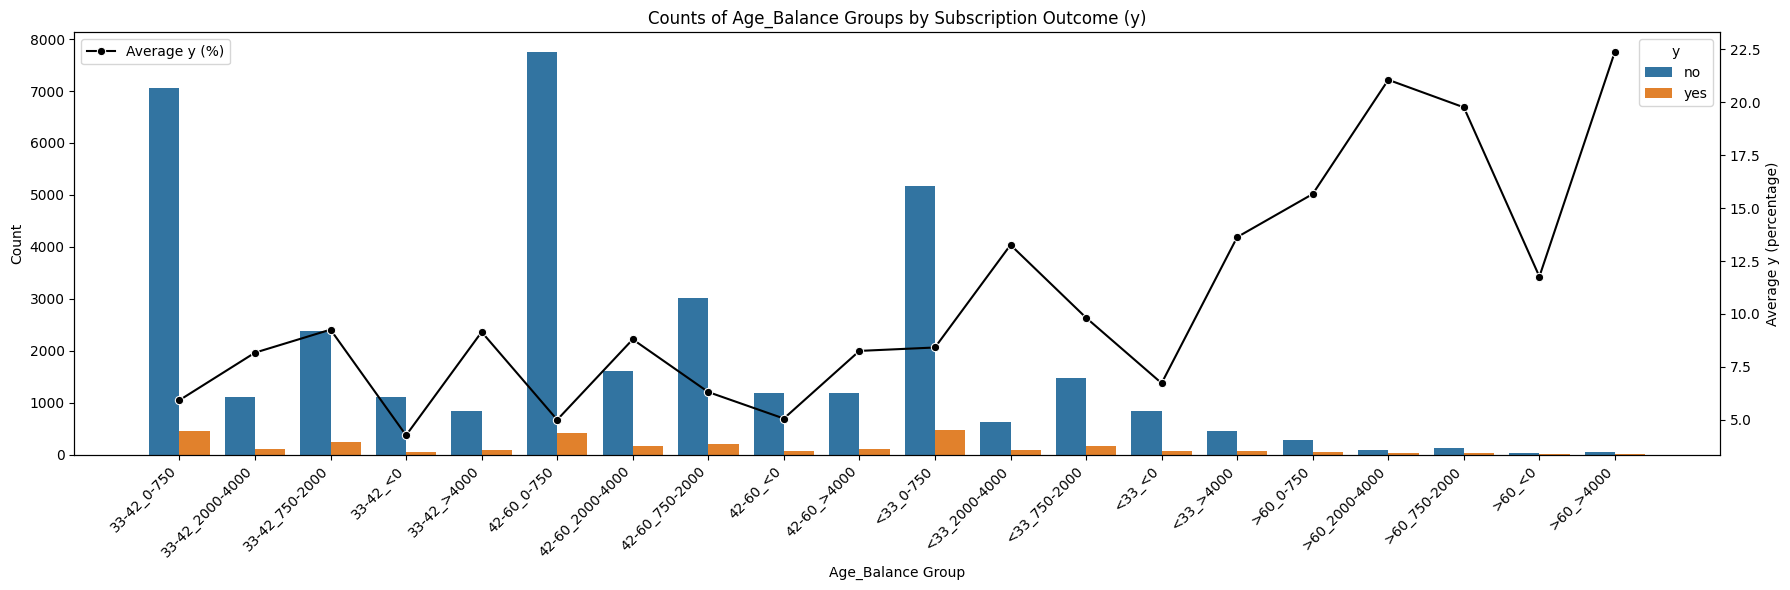

In [74]:
# Calculate counts of each age_balance_group by y
age_balance_counts = term_data.groupby(['age_balance_group', 'y']).size().reset_index(name='count')

# Calculate average y (encoded as 0/1) for each age_balance_group as percentage
avg_y_by_age_balance = term_data.groupby('age_balance_group')['y_encoded'].mean().reset_index()
avg_y_by_age_balance['y_encoded'] = avg_y_by_age_balance['y_encoded'] * 100  # convert to percentage


fig, ax1 = plt.subplots(figsize=(18, 6))

# Barplot: counts by age_balance_group and y, ordered by increasing average y
sns.barplot(
    data=age_balance_counts,
    x='age_balance_group',
    y='count',
    hue='y',
    ax=ax1
)
ax1.set_ylabel('Count')
ax1.set_xlabel('Age_Balance Group')
ax1.set_title('Counts of Age_Balance Groups by Subscription Outcome (y)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Line plot: average y_encoded by age_balance_group (percentage)
ax2 = ax1.twinx()
sns.lineplot(
    data=avg_y_by_age_balance,
    x='age_balance_group',
    y='y_encoded',
    marker='o',
    color='black',
    ax=ax2,
    label='Average y (%)'
)
ax2.set_ylabel('Average y (percentage)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

C:\Users\schakr18\AppData\Local\Temp\ipykernel_47592\3027199563.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  job_balance_counts = term_data.groupby(['job_balance_group', 'y']).size().reset_index(name='count')
C:\Users\schakr18\AppData\Local\Temp\ipykernel_47592\3027199563.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_y_by_job_balance = term_data.groupby('job_balance_group')['y_encoded'].mean().reset_index()
C:\Users\schakr18\AppData\Local\Temp\ipykernel_47592\3027199563.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fix

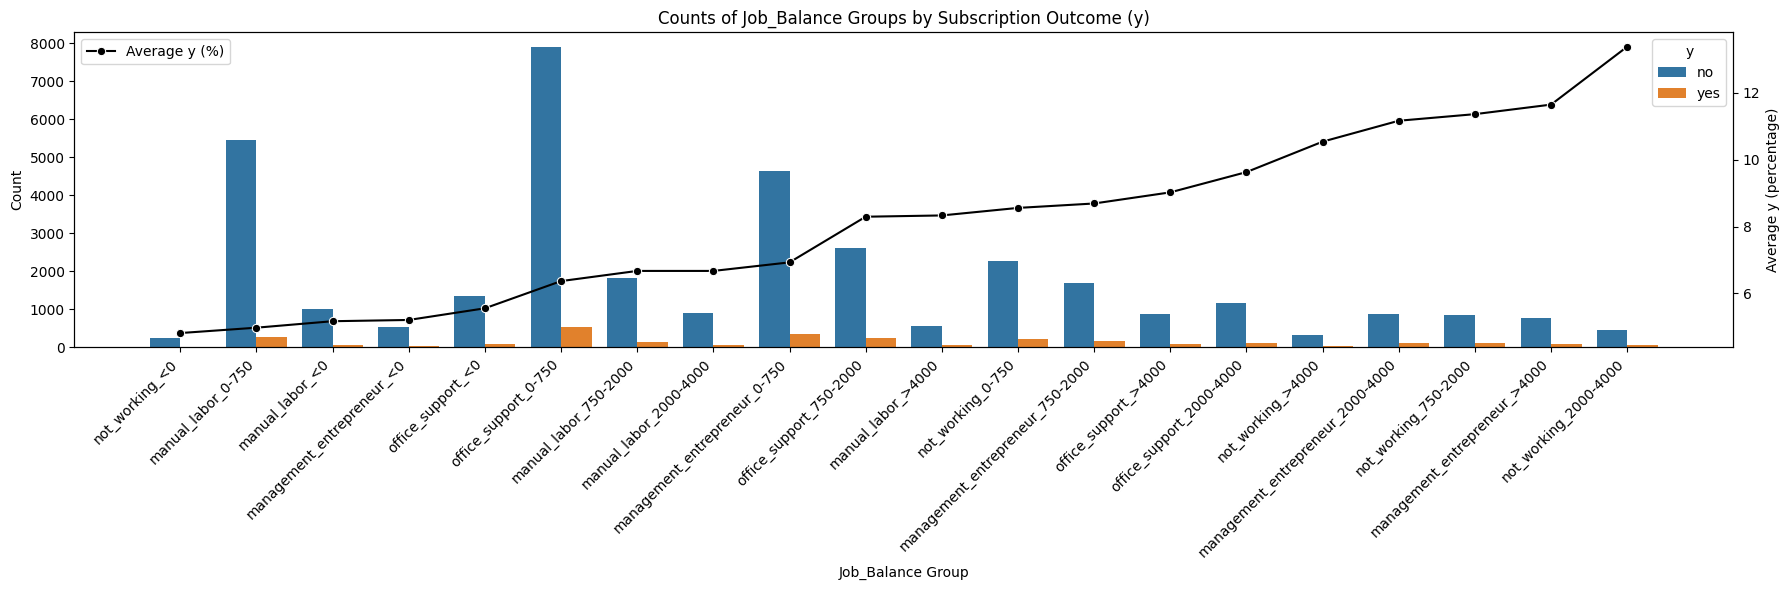

In [75]:
# Count of each job_balance_group by y
job_balance_counts = term_data.groupby(['job_balance_group', 'y']).size().reset_index(name='count')

# Average y (encoded as 0/1) by job_balance_group, as percentage
avg_y_by_job_balance = term_data.groupby('job_balance_group')['y_encoded'].mean().reset_index()
avg_y_by_job_balance['y_encoded'] = avg_y_by_job_balance['y_encoded'] * 100  # convert to percentage

# Sort job_balance_group by increasing average y value
sorted_job_balance = avg_y_by_job_balance.sort_values('y_encoded')['job_balance_group']

fig, ax1 = plt.subplots(figsize=(18, 6))

# Barplot: counts by job_balance_group and y, ordered by increasing average y
sns.barplot(
    data=job_balance_counts,
    x='job_balance_group',
    y='count',
    hue='y',
    order=sorted_job_balance,
    ax=ax1
)
ax1.set_ylabel('Count')
ax1.set_xlabel('Job_Balance Group')
ax1.set_title('Counts of Job_Balance Groups by Subscription Outcome (y)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Line plot: average y_encoded by job_balance_group (percentage)
ax2 = ax1.twinx()
sns.lineplot(
    data=avg_y_by_job_balance,
    x='job_balance_group',
    y='y_encoded',
    marker='o',
    color='black',
    ax=ax2,
    label='Average y (%)'
)
ax2.set_ylabel('Average y (percentage)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [76]:
term_data = term_data.drop(columns=['age_group_new'])
term_data.to_csv('term-deposit-marketing-background-variables-new-features.csv', index=False)

In [77]:
term_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,age_group,y_encoded,balance_group,job_group,job_balance_group,age_balance_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no,42-60,0,2000-4000,management_entrepreneur,management_entrepreneur_2000-4000,42-60_2000-4000
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no,42-60,0,0-750,office_support,office_support_0-750,42-60_0-750
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no,33-42,0,0-750,management_entrepreneur,management_entrepreneur_0-750,33-42_0-750
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no,42-60,0,750-2000,manual_labor,manual_labor_750-2000,42-60_750-2000
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no,33-42,0,0-750,not_working,not_working_0-750,33-42_0-750


In [78]:
term_data['y'].value_counts()

y
no     36354
yes     2846
Name: count, dtype: int64